In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## Karate data

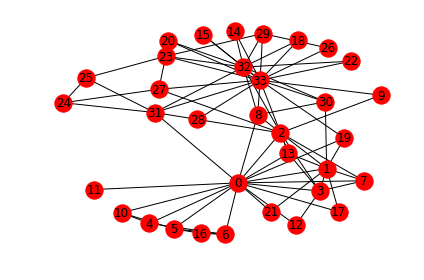

In [16]:
g = nx.karate_club_graph()
pos = nx.fruchterman_reingold_layout(g)
nx.draw_networkx(g, pos)
plt.axis('off')
plt.tight_layout();

In [13]:
nx.center(g)

[0, 1, 2, 3, 8, 13, 19, 31]

In [14]:
nx.degree_centrality(g)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

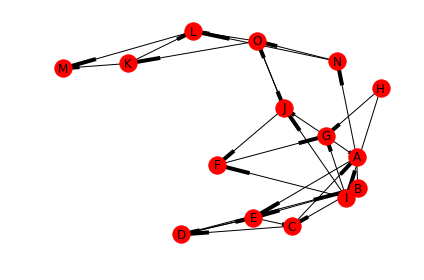

In [23]:
gd = nx.MultiDiGraph()

e = [   ('A', 'B'), ('A', 'E'), ('A', 'N'),
        ('B', 'C'), ('B', 'E'),
        ('C', 'A'), ('C', 'D'),
        ('D', 'B'), ('D', 'E'),
        ('E', 'D'), ('E', 'C'),
        ('F', 'G'),
        ('G', 'A'), ('G', 'J'),
        ('H', 'G'), ('H', 'I'),
        ('I', 'G'), ('I', 'F'), ('I', 'J'),
        ('J', 'F'), ('J', 'O'),
        ('K', 'L'), ('K', 'M'),
        ('L', 'M'),
        ('N', 'L'), ('N', 'O'),
        ('O', 'K'), ('O', 'L'),('O','J')]


gd.add_edges_from(e)

pos = nx.spring_layout(gd)
nx.draw_networkx(gd, pos)
plt.axis('off')
plt.tight_layout();

In [24]:
# IN-degree
in_d = nx.in_degree_centrality(gd)
# OUT-degree
out_d = nx.out_degree_centrality(gd)
in_d['A'], out_d['A']

(0.14285714285714285, 0.21428571428571427)

## Quiz questions

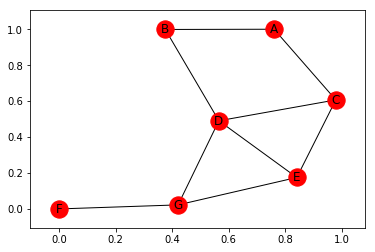

In [26]:
G1 = nx.Graph()
G1.add_edges_from([('A', 'B'),
                   ('A', 'C'),
                   ('B', 'D'),
                   ('C', 'D'),
                   ('C', 'E'),
                   ('E', 'D'),
                   ('D', 'G'),
                   ('E', 'G'),
                   ('G', 'F')])

nx.draw_networkx(G1)

In [27]:
nx.degree_centrality(G1)

{'A': 0.3333333333333333,
 'B': 0.3333333333333333,
 'C': 0.5,
 'D': 0.6666666666666666,
 'E': 0.5,
 'G': 0.5,
 'F': 0.16666666666666666}

In [28]:
nx.closeness_centrality(G1)

{'A': 0.46153846153846156,
 'B': 0.5454545454545454,
 'C': 0.6,
 'D': 0.75,
 'E': 0.6666666666666666,
 'G': 0.6,
 'F': 0.4}

In [30]:
nx.betweenness_centrality(G1, normalized = True, endpoints = False)

{'A': 0.03333333333333333,
 'B': 0.07777777777777777,
 'C': 0.18888888888888888,
 'D': 0.38888888888888884,
 'E': 0.1111111111111111,
 'G': 0.3333333333333333,
 'F': 0.0}

In [32]:
nx.edge_betweenness_centrality(G1,normalized=False)

{('A', 'B'): 2.666666666666666,
 ('A', 'C'): 4.333333333333333,
 ('B', 'D'): 5.666666666666667,
 ('C', 'D'): 3.666666666666666,
 ('C', 'E'): 3.666666666666666,
 ('D', 'E'): 2.0,
 ('D', 'G'): 6.333333333333333,
 ('E', 'G'): 3.6666666666666665,
 ('G', 'F'): 6.0}

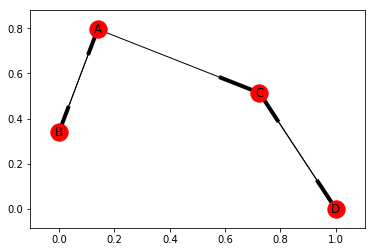

In [33]:
g2 = nx.DiGraph()
g2.add_edges_from([('B', 'A'), ('A', 'C'), ('C', 'D'), ('D', 'C'), ('A', 'B')])

nx.draw_networkx(g2)

In [34]:
pr_d = {}
for damp in [0.5, 0.8, 0.9, 0.95]:
    pr_d[str(damp)] = nx.pagerank(G=g2, alpha=damp)['D']
pr_d.items()    

dict_items([('0.5', 0.28571319580078125), ('0.8', 0.36764573423540375), ('0.9', 0.420166725100649), ('0.95', 0.4555778814326893)])

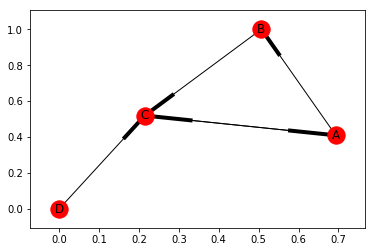

In [82]:
g3 = nx.DiGraph()
g3.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'A'), ('D', 'C')])

nx.draw_networkx(g3)

Node c 

4 nodes 

Step 0:  0.25 each one

Step 1: (c)  (0.25)(0.5) + (0.25)(1) + (0.25)(1) = 0.625

In [87]:
hubs, autr = nx.hits(g3, normalized=True, max_iter=20)
autr, hubs

({'A': 2.429983801460681e-09,
  'B': 0.29289321810158986,
  'C': 0.7071067794684264,
  'D': 0.0},
 {'A': 0.41421356195612885,
  'B': 0.2928932185186695,
  'C': 1.0065322483445805e-09,
  'D': 0.2928932185186695})

In [111]:
def hits(k):
    #step 0
    auth = [1,1,3,0]
    hub = [2,1,1,1]
    for i in range(k):
        #normalization
        hub_0 = [x/sum(hub) for x in hub]
        auth_0 = [x/sum(auth) for x in auth]
        
        auth[0] = hub_0[2]
        auth[1] = hub_0[0]
        auth[2] = hub_0[0]+hub_0[1]+hub_0[3]
        auth[3] = 0
        hub[0] = auth_0[1]+auth_0[2]
        hub[1] = auth_0[2]
        hub[2] = auth_0[0]
        hub[3] = auth_0[2]
    
    hub_1 = [x/sum(hub) for x in hub]
    auth_1 = [x/sum(auth) for x in auth]
    return (auth_1, hub_1)

hits(1)
hits(20)

([1.127343606439838e-06, 0.29289288770192135, 0.7071059849544723, 0.0],
 [0.41421309725255084,
  0.2928928877019213,
  1.1273436064398377e-06,
  0.2928928877019213])

In [37]:
nx.pagerank(g3)

{'A': 0.372526246091333,
 'B': 0.19582365458881654,
 'C': 0.39415009931985023,
 'D': 0.037500000000000006}

In [38]:
h, a = nx.hits(g3) #2
h['D'], a['D']

(0.2928932185186695, 0.0)

## Comparing measures

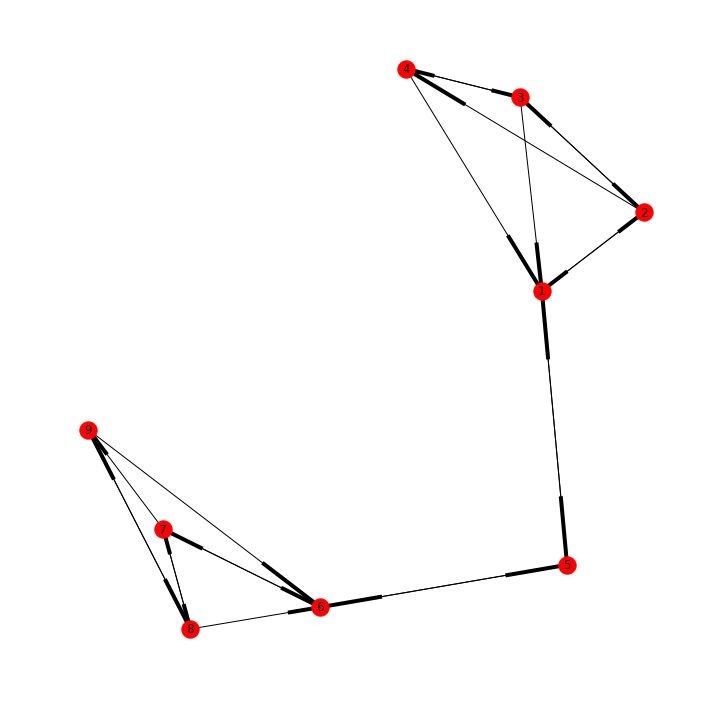

In [67]:
gex = nx.DiGraph()

e2 = [('1', '5'), ('5', '1'), 
      ('5', '6'), ('6', '5'), 
      ('4', '1'), ('3', '1'), 
      ('1', '2'), ('2', '1'), 
      ('2', '4'),
      ('2', '3'), ('3', '2'),
      ('4', '3'), ('3', '4'),
      ('8', '6'), ('9', '6'),
      ('8', '9'), ('9', '8'),
      ('7', '8'), ('8', '7'),
      ('7', '9'),
      ('6', '7'), ('7', '6')]

gex.add_edges_from(e2)
plt.figure(figsize=(10,10))
#pos = nx.random_layout(gex)
nx.draw_networkx(gex)#, pos)
plt.axis('off')
plt.tight_layout();

In [68]:
in_dg = nx.in_degree_centrality(gex)
sorted(in_dg.items(), key=lambda x: x[1], reverse=True)

[('1', 0.5),
 ('6', 0.5),
 ('5', 0.25),
 ('4', 0.25),
 ('3', 0.25),
 ('2', 0.25),
 ('8', 0.25),
 ('9', 0.25),
 ('7', 0.25)]

In [69]:
closs= nx.closeness_centrality(gex, normalized = True)
sorted(closs.items(), key=lambda x: x[1], reverse=True)

[('5', 0.4444444444444444),
 ('1', 0.42105263157894735),
 ('6', 0.42105263157894735),
 ('3', 0.36363636363636365),
 ('2', 0.36363636363636365),
 ('8', 0.36363636363636365),
 ('7', 0.36363636363636365),
 ('4', 0.34782608695652173),
 ('9', 0.34782608695652173)]

In [70]:
btwnCent = nx.betweenness_centrality(gex, normalized = True, endpoints = False)
sorted(btwnCent.items(), key=lambda x: x[1], reverse=True)

[('5', 0.5714285714285714),
 ('1', 0.5446428571428571),
 ('6', 0.5446428571428571),
 ('2', 0.21428571428571427),
 ('7', 0.21428571428571427),
 ('3', 0.008928571428571428),
 ('8', 0.008928571428571428),
 ('4', 0.0),
 ('9', 0.0)]

In [71]:
pgrank = nx.pagerank(gex)
sorted(pgrank.items(), key=lambda x: x[1], reverse=True)

[('6', 0.16583370627531527),
 ('1', 0.16583370627531524),
 ('5', 0.1576262358466881),
 ('2', 0.10896900830621481),
 ('7', 0.10896900830621481),
 ('3', 0.07702062010302185),
 ('8', 0.07702062010302185),
 ('4', 0.06936354739210397),
 ('9', 0.06936354739210397)]

In [74]:
hub, auth = nx.hits(gex)
sorted(auth.items(), key=lambda x: x[1], reverse=True)

[('6', 0.21121135254127468),
 ('1', 0.21121135254127466),
 ('9', 0.11077926439430934),
 ('4', 0.11077926439430931),
 ('3', 0.10043208814696537),
 ('8', 0.10043208814696537),
 ('7', 0.06528116009772791),
 ('2', 0.0652811600977279),
 ('5', 0.024592269639445583)]

In [73]:
sorted(hub.items(), key=lambda x: x[1], reverse=True)

[('7', 0.14848705085104585),
 ('5', 0.14848705085104583),
 ('2', 0.14848705085104583),
 ('3', 0.13613104446713567),
 ('8', 0.13613104446713567),
 ('4', 0.10954670491925043),
 ('9', 0.10954670491925043),
 ('1', 0.03159167433704517),
 ('6', 0.03159167433704517)]